In [63]:
from gensim.models import Word2Vec
import numpy as np
import pandas as pd
import emoji
import string

import nltk
#nltk.download('punkt')
from nltk import sent_tokenize, word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
#nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
#path = "/Users/miklp/Documents/GitHub/Student-Projects/datasets_483_982_spam.csv"
path = "/Users/macia/Documents/MSIA-21/IRL-MSIA/datasets_483_982_spam.csv"

#path_1 = "https://raw.githubusercontent.com/mowgl-i/Student-Projects/master/datasets_483_982_spam.csv"
with open(path) as file:
    data = pd.read_csv(file)
    
data.columns = ["class","text", "none","none","none"]

data = data[["class","text"]]

print(data.head())

print("----------")
print("Data Shape:",data.shape)

print("----------")
print("Number of Missing data:",data.isnull().sum())

print("----------")
print(round(747/5572 * 100), "%  of our data is classified as spam",data.groupby("class").count())
#data = pd.read_csv(path_1) 

  class                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
----------
Data Shape: (5572, 2)
----------
Number of Missing data: class    0
text     0
dtype: int64
----------
13 %  of our data is classified as spam        text
class      
ham    4825
spam    747


# Data preprocess


In [3]:
def clean_text(text):
    no_p = "".join([t for t in text if t  not in string.punctuation]) 
    tokenizer = RegexpTokenizer(r'\w+')
    tokens =  tokenizer.tokenize(no_p.lower())
    no_s = [t for t in tokens if t not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    no_num = [t for t in no_s if t.isalpha()]
    ready_text = [lemmatizer.lemmatize(i) for i in no_num]
    return ready_text
data['ready_text'] = data['text'].apply(lambda x: clean_text(x))

ready_text_2 = data['text'].apply(lambda x: clean_text(x))


### let's use a smaller dataset for now.

In [8]:
ready_text_3 = ready_text_2[0:100]

In [27]:
model = Word2Vec(ready_text_3, min_count = 1, window = 4, workers = 2, size =  2, seed = 1, sg = 1)
print(model)

model.train(sentences = ready_text_3, total_examples = 3, epochs = 10)


Word2Vec(vocab=577, size=2, alpha=0.025)


(8014, 9260)

In [18]:
model.wv.most_similar(['crazy'])

[('b', 0.9999490976333618),
 ('fair', 0.9999352693557739),
 ('used', 0.99990314245224),
 ('granted', 0.9999020099639893),
 ('fulfil', 0.9999011158943176),
 ('try', 0.9998875856399536),
 ('left', 0.9998664855957031),
 ('plane', 0.9998183250427246),
 ('arabian', 0.9998107552528381),
 ('never', 0.9998044967651367)]

In [19]:
model.wv.most_similar('home')

[('urgent', 0.9999925494194031),
 ('slice', 0.999908447265625),
 ('catch', 0.9997038841247559),
 ('havent', 0.9996912479400635),
 ('ken', 0.9994632005691528),
 ('dont', 0.999120831489563),
 ('wait', 0.9989949464797974),
 ('smarter', 0.998271644115448),
 ('frnds', 0.9982669949531555),
 ('getting', 0.9981332421302795)]

In [20]:
model.wv.most_similar('call')

[('later', 0.9999998211860657),
 ('yummy', 0.9999992251396179),
 ('around', 0.9999881982803345),
 ('e', 0.9999801516532898),
 ('im', 0.9999297857284546),
 ('u', 0.9998209476470947),
 ('beforehand', 0.9997919797897339),
 ('want', 0.9997065663337708),
 ('work', 0.9996907114982605),
 ('week', 0.9996808767318726)]

# Network Graph

In [43]:
import networkx as nx
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

t_vect = TfidfVectorizer(
    tokenizer = lambda x: x,
    preprocessor = lambda x: x)

%matplotlib inline

t_vect_vectors = t_vect.fit_transform(ready_text_3)


model[model.wv.vocab][:5]

C:\Users\macia\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


array([[-0.26685187,  0.18557824],
       [-0.19026826,  0.17533377],
       [ 0.04921602, -0.07592332],
       [-0.1599156 , -0.15432242],
       [ 0.17856683,  0.05245701]], dtype=float32)

In [48]:
token_counts = ready_text_3.apply(pd.Series).stack().value_counts()
token_counts.nlargest(10)

u        18
call     14
im       13
free     10
like      9
go        8
dont      8
sorry     8
å         8
ok        8
dtype: int64

In [50]:
len(t_vect.vocabulary_) == len(token_counts)

True

In [53]:
t_vect.idf_[0:15]

array([4.92197334, 4.92197334, 4.92197334, 4.92197334, 4.92197334,
       4.92197334, 4.92197334, 4.51650823, 4.92197334, 4.92197334,
       4.92197334, 4.92197334, 4.92197334, 3.82336105, 4.92197334])

In [54]:
pd.DataFrame(t_vect.idf_, index=t_vect.get_feature_names(),columns=["idf_weights"])

,idf_weights
abiola,4.921973
abt,4.921973
ac,4.921973
accomodations,4.921973
actin,4.921973
...,...
yummy,4.921973
yup,4.516508
å,3.535679
ì,4.516508


In [99]:

from itertools import combinations

word_pairs = list(combinations(list(model.wv.vocab.keys()),2))

In [123]:
Edge_weight_test = []
for pair in word_pairs:
    edge_weight = model.wv.similarity(pair[0],pair[1])
    Edge_weight_test.append(edge_weight)
print(Edge_weight_test[0:10])
print(word_pairs[0:10])

[0.9906416, -0.9256644, 0.19429585, -0.6267785, 0.63718593, 0.9699481, 0.39329907, 0.09028146, 0.39763972, 0.9186888]
[('go', 'jurong'), ('go', 'point'), ('go', 'crazy'), ('go', 'available'), ('go', 'bugis'), ('go', 'n'), ('go', 'great'), ('go', 'world'), ('go', 'la'), ('go', 'e')]


In [187]:
test = []
for word_count in token_counts.items():
   test.append(word_count)



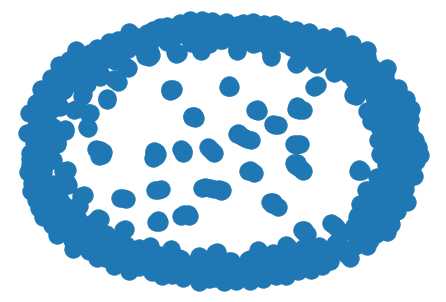

In [190]:
testgraph = nx.Graph()
for n in test:
    testgraph.add_node(n[0])

for pair in word_pairs:
    edge_weight = model.wv.similarity(pair[0],pair[1])
    if edge_weight > .99999:
        testgraph.add_edge(pair[0],pair[1],weight = edge_weight)
nx.draw(testgraph)
plt.show()

    

In [213]:
#!pip install --user nxviz
#from nxviz import CircosPlot

  Using cached https://files.pythonhosted.org/packages/d3/7b/b2b063f8c1e0e055036bc8c3e41b3ed1a45f02bb47f4db3aff1d630509e1/nxviz-0.6.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/1a/c0/69e3f695d7384012e90be1e16570c08953baae00fd98094179ef87c7d5a2/matplotlib-3.1.1-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/20/5b/229ae2b481c779988cd32fb8ff99d3633af963576964a5b8629bddde747d/hypothesis-4.34.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/b1/69/fcc29820befae2b96fd0b01225577af653e87cd0914634bb2d372a457bd7/pandas-0.25.1-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/bc/3f/4f733cd0b1b675f34beb290d465a65e0f06b492c00b111d1b75125062de1/PyYAML-5.1.2-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/2f/19/d5f71752f71451ccc5ed5f6739e9da4a235f38783fdaf3629cae41b2ca7b/pytest-5.1.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


ModuleNotFoundError: No module named 'nxviz'

In [197]:
print(testgraph.number_of_nodes())
print(testgraph.number_of_edges())

577
269


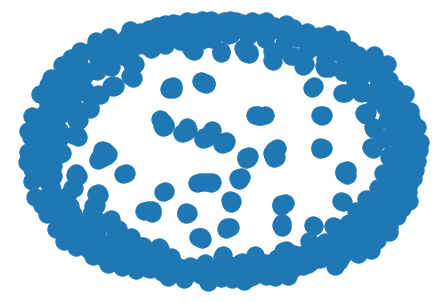

In [204]:
#test_graph = nx.Graph()
for word_count in token_counts.items():
    test_graph.add_node(word_count[0] , size = word_count[1])

for pair in word_pairs:
    edge_weight = model.wv.similarity(pair[0],pair[1])
    if edge_weight > .99999:
        test_graph.add_edge(pair[0],pair[1],weight = edge_weight)
nx.draw(test_graph)
plt.show()
#nx.write_gexf(tweet_graph,path=r'./tweet_graph.gexf') 

In [201]:
#test_graph.node(50)

In [202]:
test_graph.number_of_nodes()

577

In [205]:
test_graph.number_of_edges()

269

In [92]:
num_words = 10
test_1_graph = nx.Graph()
# for word_count in token_counts.items():
#     for word_count in t_vect.vocabulary_.items():
#        test_1_graph.add_node(word_count[0], count= word_count[1])

for word_count in range(len(t_vect.idf_)):
    test_1_graph.add_node(word_count[0], tfidf = word_count[1])
    test_1_graph.add_node(t_vect.get_feature_names()[word_count], tfidf = t_vect.idf_[word_count])

#for word in list(opt_vector_model.wv.vocab.keys()):
#    word_scores = opt_vector_model.wv.most_similar(word, topn=num_words)
#    for i in range(num_words):
#        tweet_graph.add_edge(word,word_scores[i][0],weight=word_scores[i][1])
#nx.write_gexf(tweet_graph,path=f'./tweet_graph_{num_words}_tfidf.gexf')

nx.draw(test_1_graph)

TypeError: 'int' object is not subscriptable